In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [16]:
x = list()
y = list()
v = list()
yaw = list()
yawd = list()

x_m = list()
y_m = list()

x_gt = list()
y_gt = list()
vx_gt = list()
vy_gt = list()

meas_type = list()
NIS_radar = list()
NIS_laser = list()

#with open('sample-laser-radar-measurement-data-1.txt') as f:
with open('results/data2_out.txt') as f:
    line = f.readline()
    line = f.readline()
    while line != "":
        row = line.split('\n')[0].split('\t')
        print(row)
        x.append(row[0])
        y.append(row[1])
        v.append(row[2])
        yaw.append(row[3])
        yawd.append(row[4])
        
        x_m.append(row[5])
        y_m.append(row[6])
        
        x_gt.append(row[7])
        y_gt.append(row[8])
        vx_gt.append(row[9])
        vy_gt.append(row[10])
        
        if (row[11] == 'R'):
            NIS_radar.append(row[12])
        elif (row[11] == 'L'):
            NIS_laser.append(row[12])
        
        line = f.readline()

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'L', '6.89908e-310']
['0.0342172', '-0.0342172', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'R', '1.58074']
['1.55613', '-0.12928', '1.641', '0', '-2.77556e-17', '1.55945', '-0.138501', '2.09897', '0.0522228', '2.19595', '0.109339', 'L', '0.267721']
['1.63071', '0.0196089', '2.08937', '-0.0515007', '-0.0527441', '1.81209', '0.0474826', '2.09897', '0.0522228', '2.19595', '0.109339', 'R', '2.83374']
['3.87777', '-0.129921', '3.06334', '-0.295194', '-0.18332', '3.89093', '-0.134166', '4.29136', '0.215312', '2.28434', '0.226323', 'L', '1.19685']
['3.94668', '0.0711972', '2.82212', '0.089557', '0.132642', '4.19528', '0.218461', '4.29136', '0.215312', '2.28434', '0.226323', 'R', '4.06252']
['6.84917', '0.414692', '3.80903', '0.285432', '0.301105', '6.86352', '0.416817', '6.56942', '0.496096', '2.36382', '0.348847', 'L', '0.673824']
['6.76578', '0.440781', '3.64992', '0.334487', '0.357854', '6.43926', '0.472879', '6.56942', '0.496096',

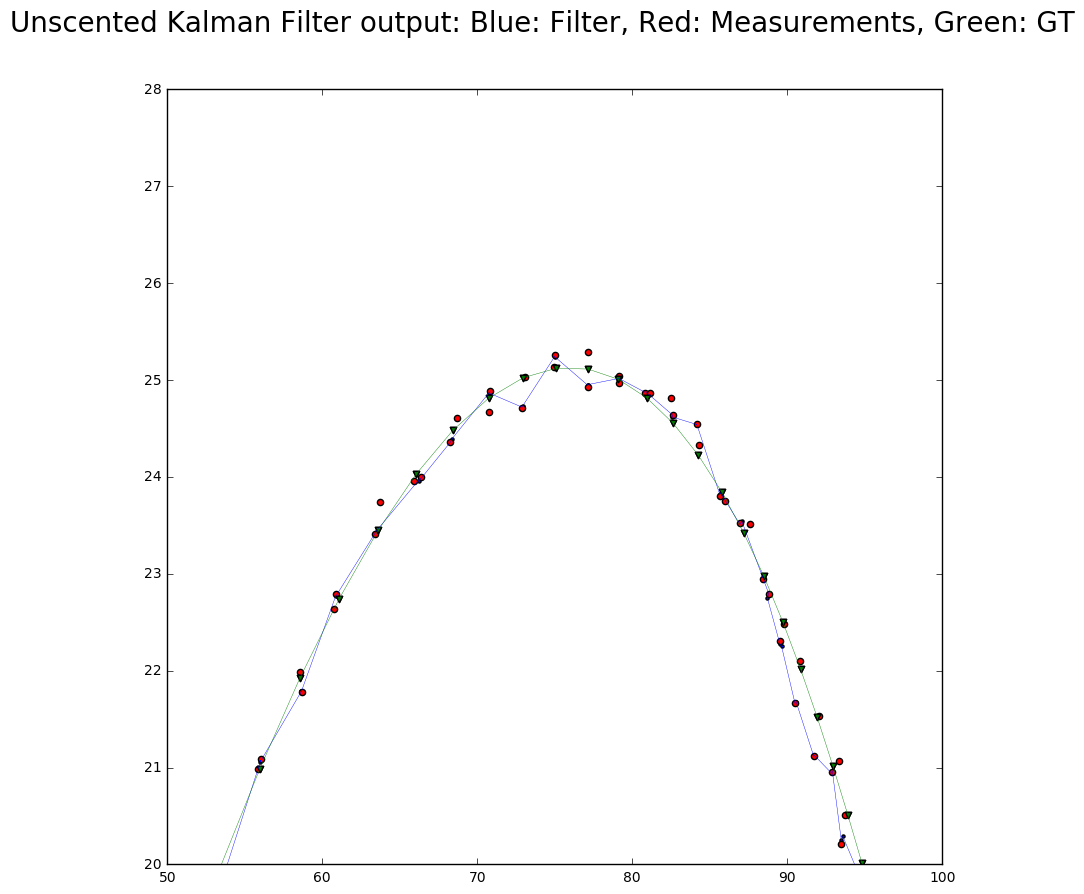

In [19]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Unscented Kalman Filter output: Blue: Filter, Red: Measurements, Green: GT",fontsize=20)
ax1 = plt.scatter(x,y,marker='.')
# plt.axis([4,8,-14,-10])
plt.axis([50,100,20,28])
ax11 = plt.plot(x,y,linewidth=0.3)
ax2 = plt.scatter(x_m,y_m,c='r',marker='o')
ax3 = plt.scatter(x_gt,y_gt,c='g',marker='v')
ax33 = plt.plot(x_gt,y_gt,c='g',linewidth=0.3)
# plt.scatter(x,y)

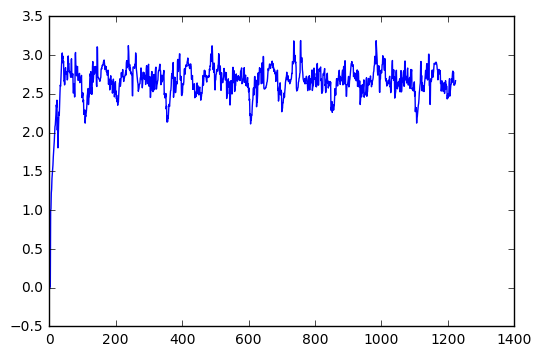

In [12]:
#plot velocity
plt.plot(v)

[0, 100, 0, 20]

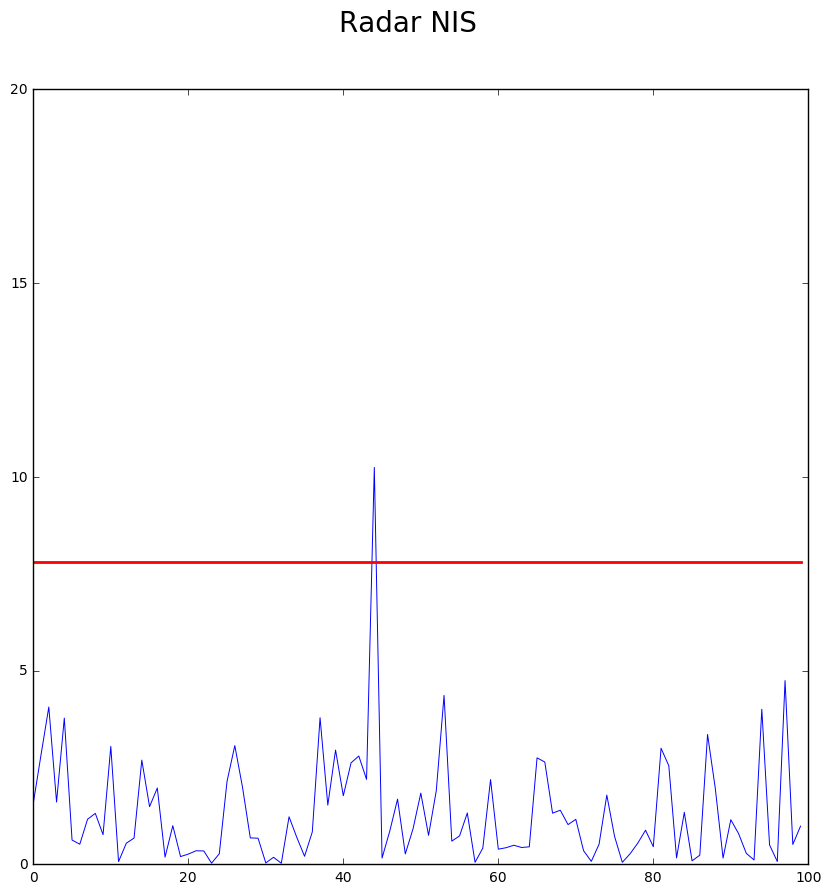

In [20]:
#Radar NIS
#From Chi Squared Dis with 3 DOF for Radar, NIS 95% < 7.815
NIS95_radar = np.ones(len(NIS_radar))*7.815

fig2 = plt.figure(figsize=(10,10))
fig2.suptitle("Radar NIS",fontsize=20)
ax1 = plt.plot(NIS_radar,linewidth=0.7)
ax2 = plt.plot(NIS95_radar,'r',linewidth=2)
# plt.axis([0,600,0,20])
plt.axis([0,100,0,20])

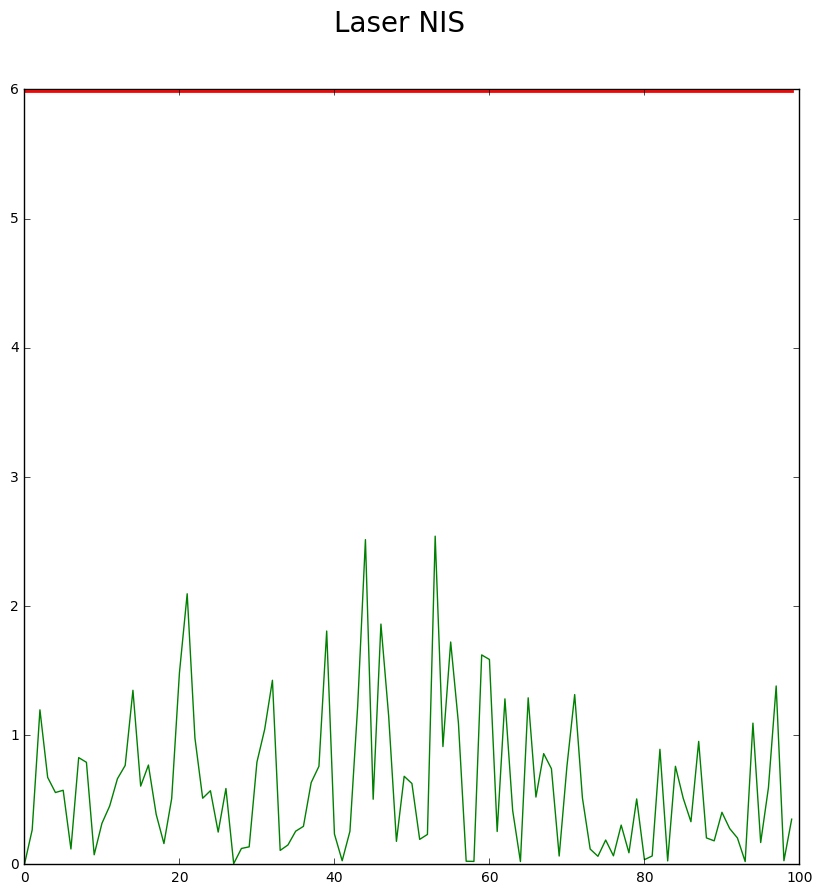

In [21]:
#Laser NIS

#From Chi Squared Dis with 2 DOF for Laser, NIS 95% < 5.991
NIS95_laser = np.ones(len(NIS_laser))*5.991

fig3 = plt.figure(figsize=(10,10))
fig3.suptitle("Laser NIS",fontsize=20)
ax1 = plt.plot(NIS_laser,'g',linewidth=1)
ax2 = plt.plot(NIS95_laser,'r',linewidth=2)
# plt.axis([0,600,0,10])
plt.axis([0,100,0,10])